## EDA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv('netflix_titles.csv')

# Mostrar las primeras filas y la forma
df.head(5), df.shape

(  show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water              NaN   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans              NaN   
 4      s5  TV Show           Kota Factory              NaN   
 
                                                 cast        country  \
 0                                                NaN  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
 3                                                NaN            NaN   
 4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
 
            date_added  release_year rating   duration  \
 0  September 25, 2021          2020  PG-13     90 min   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 2  Septembe

In [3]:
# información general y valores nulos
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Conteo de nulos por columna
nulls = df.isnull().sum().sort_values(ascending=False)
nulls[nulls > 0]

director      2634
country        831
cast           825
date_added      10
rating           4
duration         3
dtype: int64

#### Limpieza básica / preparación de columnas

In [5]:
# limpiar nombres (todo lowercase y sin espacios)
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
# Convertir date_added y extraer año/mes/dia
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # coerce convierte formatos inválidos a NaT
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month
df['added_month_name'] = df['date_added'].dt.month_name()

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [7]:
# Revisar tipos (Movie / TV Show)
df['type'].value_counts(dropna=False)

# Normalizar duration: extraer número (minutos) para movies y temporadas para series
def parse_duration(d):
    if pd.isna(d):
        return np.nan
    d = str(d)
    # ejemplos: "90 min" o "1 Season" o "2 Seasons"
    if 'min' in d:
        try:
            return int(d.split()[0])
        except:
            return np.nan
    if 'Season' in d:
        try:
            return int(d.split()[0])
        except:
            return np.nan
    return np.nan

df['duration_parsed'] = df['duration'].apply(parse_duration)

In [8]:
# Separar duration a dos columnas según tipo
df['duration_minutes'] = np.where(df['type'].str.lower() == 'movie', df['duration_parsed'], np.nan)
df['num_seasons'] = np.where(df['type'].str.lower() == 'tv show', df['duration_parsed'], np.nan)

In [9]:
# Explorar países y géneros
# Top 20 países 
top_countries = df['country'].value_counts().head(20)
top_countries


country
United States                    2818
India                             972
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Germany                            67
Name: count, dtype: int64

In [10]:
# desagregar countries y contar apariciones por país
# Primero eliminar NaN
country_series = df['country'].dropna().str.split(',').explode().str.strip()
country_counts = country_series.value_counts().head(20)
country_counts


country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Belgium             90
Name: count, dtype: int64

In [11]:
# desagregar listed_in (géneros/categories)
genre_series = df['listed_in'].dropna().str.split(',').explode().str.strip()
genre_counts = genre_series.value_counts().head(20)
genre_counts


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: count, dtype: int64

#### Graficos vlave

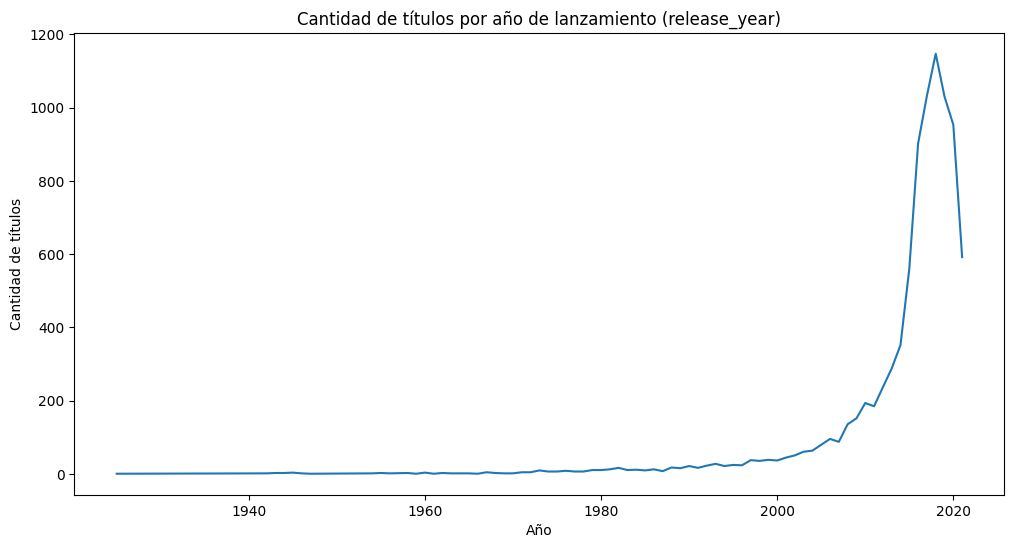

In [12]:
# títulos por año (por date_added cuando exista, si no usar release_year)
plt.figure(figsize=(12,6))

df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Cantidad de títulos por año de lanzamiento (release_year)')
plt.xlabel('Año')
plt.ylabel('Cantidad de títulos')
plt.show()


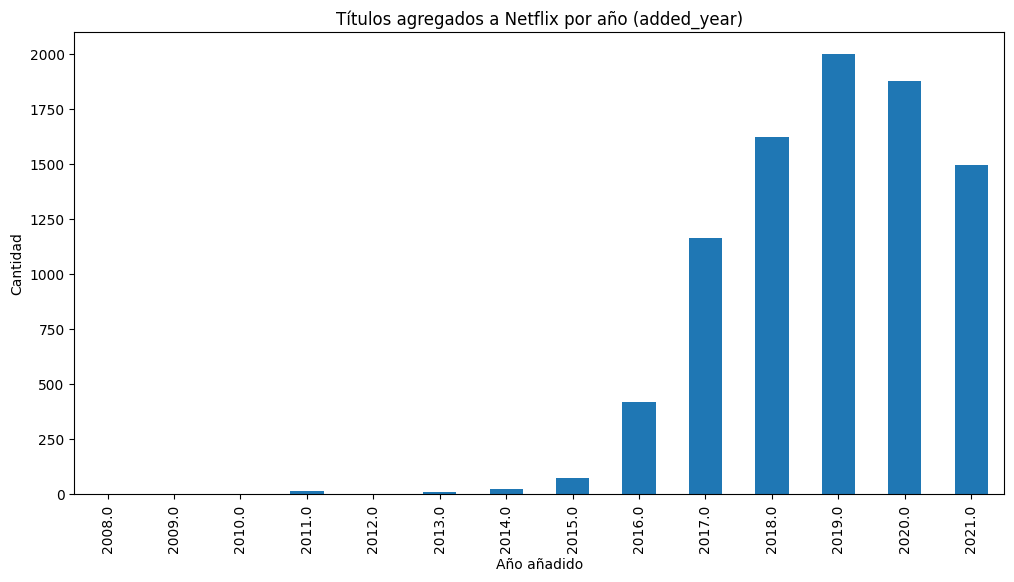

In [13]:
plt.figure(figsize=(12,6))
df['added_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Títulos agregados a Netflix por año (added_year)')
plt.xlabel('Año añadido')
plt.ylabel('Cantidad')
plt.show()


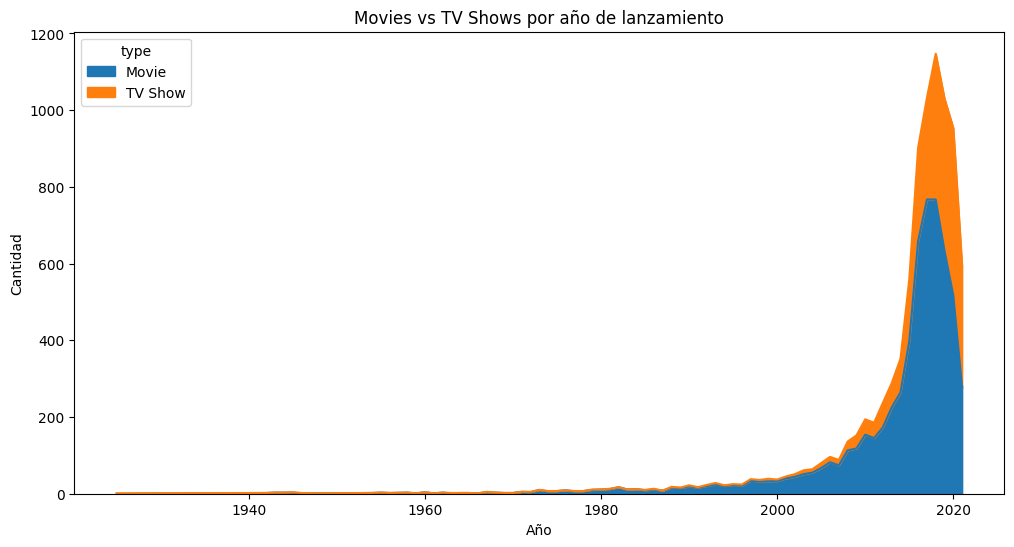

In [14]:
# movies vs tv shows por año de release
pivot = df.pivot_table(index='release_year', columns='type', values='title', aggfunc='count').fillna(0)
pivot[['Movie','TV Show']].plot(kind='area', stacked=True, figsize=(12,6))
plt.title('Movies vs TV Shows por año de lanzamiento')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()


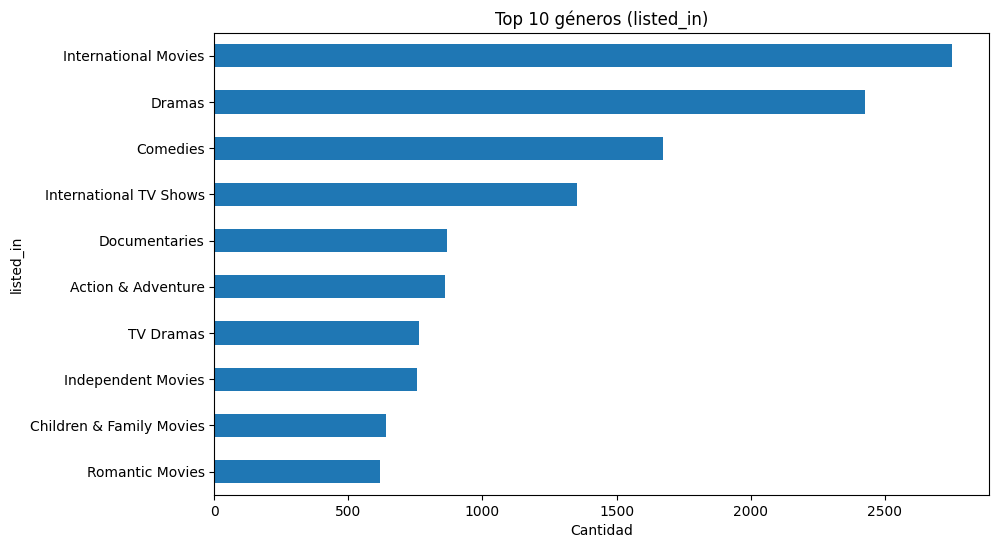

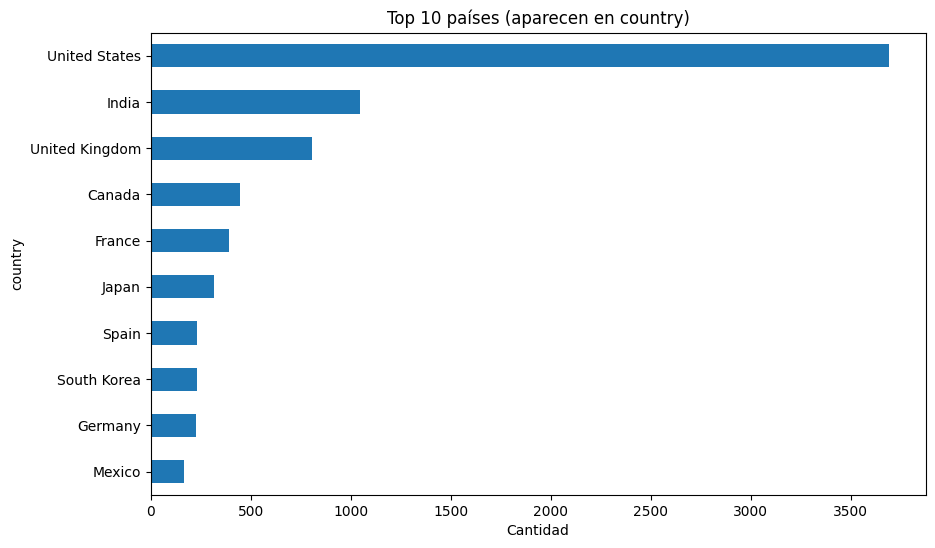

In [15]:
# top 10 géneros
plt.figure(figsize=(10,6))
genre_counts.head(10).sort_values().plot(kind='barh')
plt.title('Top 10 géneros (listed_in)')
plt.xlabel('Cantidad')
plt.show()

# top 10 países
plt.figure(figsize=(10,6))
country_counts.head(10).sort_values().plot(kind='barh')
plt.title('Top 10 países (aparecen en country)')
plt.xlabel('Cantidad')
plt.show()


In [16]:
# palabras más comunes en description (limpio y tokenizo muy básico)
from collections import Counter
import re

descriptions = df['description'].dropna().str.lower().str.replace(r'[^a-z0-9\s]', ' ', regex=True)
words = ' '.join(descriptions).split()
stopwords = set(['the','and','a','to','of','in','with','his','her','for','on','is','as','by','from','that'])
words = [w for w in words if w not in stopwords and len(w) > 3]
common = Counter(words).most_common(25)
common


[('their', 1671),
 ('when', 1517),
 ('this', 1396),
 ('after', 994),
 ('life', 845),
 ('young', 729),
 ('into', 715),
 ('family', 635),
 ('they', 635),
 ('world', 570),
 ('love', 504),
 ('woman', 486),
 ('friends', 445),
 ('must', 398),
 ('series', 396),
 ('while', 377),
 ('documentary', 365),
 ('about', 356),
 ('find', 341),
 ('school', 339),
 ('them', 319),
 ('father', 317),
 ('home', 317),
 ('finds', 313),
 ('three', 301)]

In [17]:
# Guardar dataset limpio con nuevas columnas
df.to_csv('netflix_titles_clean.csv', index=False)
print("Guardado: netflix_titles_clean.csv")

# Crear un resumen CSV con conteos clave 
summary = {
    'total_titles': [len(df)],
    'total_movies': [len(df[df['type'].str.lower()=='movie'])],
    'total_tvshows': [len(df[df['type'].str.lower()=='tv show'])],
    'years_range': [f"{int(df['release_year'].min())} - {int(df['release_year'].max())}"]
}
summary_df = pd.DataFrame(summary)
summary_df.to_csv('netflix_summary.csv', index=False)
summary_df


Guardado: netflix_titles_clean.csv


,total_titles,total_movies,total_tvshows,years_range
0,8807,6131,2676,1925 - 2021
